# Indeed dataset

### Data Understanding

In [1]:
#Exploratory 
import pandas as pd
import numpy as np
import missingno


#Data Visualization 
import seaborn as sns
import folium
from wordcloud import WordCloud
import matplotlib.pyplot as plt


#Data Modeling
import nltk
from nltk.corpus import gutenberg, stopwords
#from nltk.collocations import *
from nltk import FreqDist
from nltk import word_tokenize
import string
import re

#Data Evaluation 

#Spacy
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

#Ignore any warnings
import warnings;
warnings.filterwarnings('ignore')


## Data Understanding

In [2]:
df = pd.read_csv('../Data/20191031__30k_data.csv')
df.head()

,Job Title,Job Description,Job Type,Categories,Location,City,State,Country,Zip Code,Address,...,Employer Phone,Employer Logo,Companydescription,Employer Location,Employer City,Employer State,Employer Country,Employer Zip Code,Uniq Id,Crawl Timestamp
0,Shift Manager,"<div id=""jobDescriptionText"" class=""jobsearch-...",NaN,NaN,"Mission Hills, CA 91345",Mission Hills,CA,United States,91345,NaN,...,NaN,https://d2q79iu7y748jz.cloudfront.net/s/_squar...,Del Taco is an American quick service restaura...,"Mission Hills, CA 91345",Mission Hills,CA,United States,91345,511f9a53920f4641d701d51d3589349f,2019-08-24 09:13:18 +0000
1,Operations Support Manager,"<div id=""jobDescriptionText"" class=""jobsearch-...",NaN,NaN,"Atlanta, GA 30342",Atlanta,GA,United States,30342,NaN,...,NaN,https://d2q79iu7y748jz.cloudfront.net/s/_logo/...,"Based in Atlanta, FOCUS Brands Inc. is an inno...",NaN,NaN,NaN,United States,NaN,4955daf0a3facbe2acb6c429ba394e6d,2019-09-19 08:16:55 +0000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30002 entries, 0 to 30001
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Job Title           30002 non-null  object 
 1   Job Description     30002 non-null  object 
 2   Job Type            0 non-null      float64
 3   Categories          0 non-null      float64
 4   Location            30002 non-null  object 
 5   City                30002 non-null  object 
 6   State               30002 non-null  object 
 7   Country             30002 non-null  object 
 8   Zip Code            16252 non-null  object 
 9   Address             0 non-null      float64
 10  Salary From         0 non-null      float64
 11  Salary To           0 non-null      float64
 12  Salary Period       0 non-null      float64
 13  Apply Url           18392 non-null  object 
 14  Apply Email         0 non-null      float64
 15  Employees           0 non-null      float64
 16  Indu

### Drop all the 0 non-null since these wont provide information 

In [6]:
# Remove all the 0 non-null columns
df = df.dropna(axis = 1, how = 'all',inplace=False)
df.head(2)

,Job Title,Job Description,Location,City,State,Country,Zip Code,Apply Url,Company Name,Employer Logo,Companydescription,Employer Location,Employer City,Employer State,Employer Country,Employer Zip Code,Uniq Id,Crawl Timestamp
0,Shift Manager,"<div id=""jobDescriptionText"" class=""jobsearch-...","Mission Hills, CA 91345",Mission Hills,CA,United States,91345,NaN,Del Taco LLC,https://d2q79iu7y748jz.cloudfront.net/s/_squar...,Del Taco is an American quick service restaura...,"Mission Hills, CA 91345",Mission Hills,CA,United States,91345,511f9a53920f4641d701d51d3589349f,2019-08-24 09:13:18 +0000
1,Operations Support Manager,"<div id=""jobDescriptionText"" class=""jobsearch-...","Atlanta, GA 30342",Atlanta,GA,United States,30342,NaN,FOCUS Brands,https://d2q79iu7y748jz.cloudfront.net/s/_logo/...,"Based in Atlanta, FOCUS Brands Inc. is an inno...",NaN,NaN,NaN,United States,NaN,4955daf0a3facbe2acb6c429ba394e6d,2019-09-19 08:16:55 +0000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30002 entries, 0 to 30001
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Job Title           30002 non-null  object
 1   Job Description     30002 non-null  object
 2   Location            30002 non-null  object
 3   City                30002 non-null  object
 4   State               30002 non-null  object
 5   Country             30002 non-null  object
 6   Zip Code            16252 non-null  object
 7   Apply Url           18392 non-null  object
 8   Company Name        30000 non-null  object
 9   Employer Logo       18708 non-null  object
 10  Companydescription  19662 non-null  object
 11  Employer Location   3348 non-null   object
 12  Employer City       3316 non-null   object
 13  Employer State      3316 non-null   object
 14  Employer Country    30002 non-null  object
 15  Employer Zip Code   1743 non-null   object
 16  Uniq Id             30

In [8]:
df['Job Title']

0                                           Shift Manager
1                              Operations Support Manager
2                           Senior Product Manager - Data
3                              Part-Time Office Concierge
4                             Print & Marketing Associate
                               ...                       
29997                                    Bilingual Teller
29998                    Rental Consultant - Harrison, OH
29999                        Product Support Specialist 5
30000                     Marketing Strategist (Contract)
30001    Business Intelligence Data Warehouse ETL Manager
Name: Job Title, Length: 30002, dtype: object

In [9]:
df.Location

0        Mission Hills, CA 91345
1              Atlanta, GA 30342
2                    Chicago, IL
3                     Festus, MO
4         Cedar Rapids, IA 52404
                  ...           
29997         Lakewood, CO 80226
29998         Harrison, OH 45030
29999        Melbourne, FL 32940
30000              San Diego, CA
30001              Jefferson, WI
Name: Location, Length: 30002, dtype: object

In [11]:
df.Country.value_counts()

United States    30002
Name: Country, dtype: int64

In [12]:
df['Apply Url']

0                                                      NaN
1                                                      NaN
2                                                      NaN
3                                                      NaN
4        https://retailcareers.staples.com/ShowJob/Id/7...
                               ...                        
29997    https://boards.greenhouse.io/moneytree33/jobs/...
29998                                                  NaN
29999    https://downtime4.adp.com/WorkforceNow/index.html
30000    https://chj.tbe.taleo.net/chj04/ats/careers/v2...
30001                                                  NaN
Name: Apply Url, Length: 30002, dtype: object

Maybe turn all urls to url, and all Nans to unknown

In [13]:
df['Company Name']

0                           Del Taco LLC
1                           FOCUS Brands
2                                  Vibes
3        Coldwell Banker Real Estate LLC
4                         Staples Stores
                      ...               
29997                          Moneytree
29998                     Circle Storage
29999                        SUN NUCLEAR
30000      Ajinomoto Bio-Pharma Services
30001                         NewCareers
Name: Company Name, Length: 30002, dtype: object

In [14]:
df['Employer Logo']

0        https://d2q79iu7y748jz.cloudfront.net/s/_squar...
1        https://d2q79iu7y748jz.cloudfront.net/s/_logo/...
2                                                      NaN
3                                                      NaN
4        https://d2q79iu7y748jz.cloudfront.net/s/_logo/...
                               ...                        
29997    https://d2q79iu7y748jz.cloudfront.net/s/_logo/...
29998                                                  NaN
29999                                                  NaN
30000    https://d2q79iu7y748jz.cloudfront.net/s/_logo/...
30001                                                  NaN
Name: Employer Logo, Length: 30002, dtype: object

Add both dataset logo or nologo

In [15]:
df['Companydescription'][90]

'Bloomberg is a global information and technology company. We use our dynamic network of data, ideas and analysis to solve difficult probl...'

In [16]:
df['Companydescription']

0        Del Taco is an American quick service restaura...
1        Based in Atlanta, FOCUS Brands Inc. is an inno...
2        Vibes Corp. reputation was built and establish...
3                                                      NaN
4        Staples is The Worklife Fulfillment Company, h...
                               ...                        
29997    Moneytree is a family-run business that has be...
29998                                                  NaN
29999                                                  NaN
30000    Ajinomoto Bio-Pharma Services is a fully integ...
30001    NewCareers is a full service executive/profess...
Name: Companydescription, Length: 30002, dtype: object

In [18]:
df['Job Description'][8462]

'<div id="jobDescriptionText" class="jobsearch-jobDescriptionText"><div>\n<p>At Novolex, we take pride in supporting our families across the globe. Our team is rich in diversity and our entrepreneurial culture encourages continuous personal growth and teamwork. Our careers include manufacturing, engineering, procurement, supply chain, finance, HR, product development, sales, marketing and an ever-expanding array of others to support our continuing rapid growth.</p>\n<p>\nShipping and Inventory Coordinator</p>\n<p></p>\n<br>\n<p><b>\nPosition Summary:</b></p>\n<p>\nThis position will be responsible for monitoring product leaving the warehouse. Duties will include, creating shipping documents, such as bill of ladings and packing slips. Monitors sales orders and plan efficiently that the most effective option is utilized to fulfill customer demands. Works closely with inventory and warehouse personnel to ensure orders are being fulfilled properly. Works with the SAP (ERP) system on a regu

In [19]:
df['Company Name'].sort_values()

13883            #1 Pest Control
14117                      #6870
12849    #twiceasnice Recruiting
25455            & Other Stories
4556                  &Marketing
                  ...           
10516                  yorastore
18629                      zoovu
10762                        埃森哲
4110                         NaN
29110                        NaN
Name: Company Name, Length: 30002, dtype: object

In [20]:
df.loc[29110]

Job Title                               Knowledge Management Specialist
Job Description       <div id="jobDescriptionText" class="jobsearch-...
Location                                                     Duluth, GA
City                                                             Duluth
State                                                                GA
Country                                                   United States
Zip Code                                                            NaN
Apply Url             https://primerica.wd1.myworkdayjobs.com/en-US/...
Company Name                                                        NaN
Employer Logo                                                       NaN
Companydescription                                                  NaN
Employer Location                                                   NaN
Employer City                                                       NaN
Employer State                                                  

## Data Viz

<AxesSubplot:>

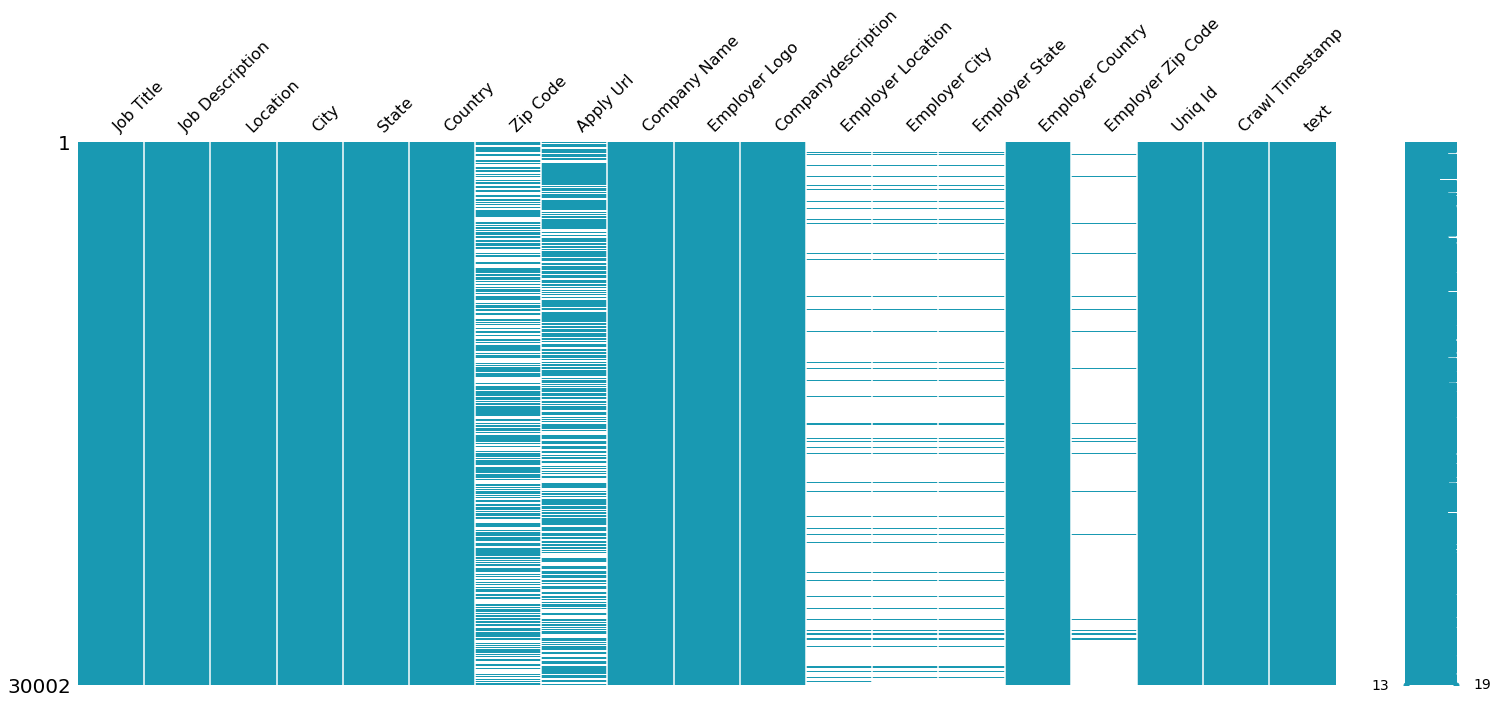

In [37]:
# checking missing data in our Indeed dataframe.
missingno.matrix(df,color=(0.1, 0.6, 0.7))

In [ ]:
df['Employer Logo' ]

In [38]:
sns.countplot(x='Employer Logo', 
              data=df,
              palette= "Set2")

<AxesSubplot:xlabel='Employer Logo', ylabel='count'>

Error in callback <function flush_figures at 0x7fe6ce817550> (for post_execute):


KeyboardInterrupt: 

In [ ]:
df['Companydescription' ]

In [ ]:
df['Location' ]

- short vs long description 

## Data Preparation

CompanyLogo / noCompanyLogo.... Companydescription  / Companyprofile


In [42]:
df['Employer Logo'].notna()

0        True
1        True
2        True
3        True
4        True
         ... 
29997    True
29998    True
29999    True
30000    True
30001    True
Name: Employer Logo, Length: 30002, dtype: bool

In [21]:
# Fill nulls with 'no company profile'
df['Companydescription' ]= df['Companydescription'].fillna('unknown')

# Fill nulls with 'no company logo'
df['Employer Logo']= df['Employer Logo'].fillna(0)

# Fill nulls with 'no companylogo'
df['has_company_logo' ]= df['has_company_logo'].replace(0, 'nocompanylogo')
df['has_company_logo' ]= df['has_company_logo'].replace(1, 'hascompanylogo')




In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30002 entries, 0 to 30001
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Job Title           30002 non-null  object
 1   Job Description     30002 non-null  object
 2   Location            30002 non-null  object
 3   City                30002 non-null  object
 4   State               30002 non-null  object
 5   Country             30002 non-null  object
 6   Zip Code            16252 non-null  object
 7   Apply Url           18392 non-null  object
 8   Company Name        30000 non-null  object
 9   Employer Logo       30002 non-null  object
 10  Companydescription  30002 non-null  object
 11  Employer Location   3348 non-null   object
 12  Employer City       3316 non-null   object
 13  Employer State      3316 non-null   object
 14  Employer Country    30002 non-null  object
 15  Employer Zip Code   1743 non-null   object
 16  Uniq Id             30

In [23]:
df['text'] = '  '+ df['Job Title'] +'  '+ df['Job Description'] +'  '+ df['State']+'  '+ df['Employer Logo']+'  '+ df['Companydescription'] + '  '
df.head(2)


,Job Title,Job Description,Location,City,State,Country,Zip Code,Apply Url,Company Name,Employer Logo,Companydescription,Employer Location,Employer City,Employer State,Employer Country,Employer Zip Code,Uniq Id,Crawl Timestamp,text
0,Shift Manager,"<div id=""jobDescriptionText"" class=""jobsearch-...","Mission Hills, CA 91345",Mission Hills,CA,United States,91345,NaN,Del Taco LLC,https://d2q79iu7y748jz.cloudfront.net/s/_squar...,Del Taco is an American quick service restaura...,"Mission Hills, CA 91345",Mission Hills,CA,United States,91345,511f9a53920f4641d701d51d3589349f,2019-08-24 09:13:18 +0000,"Shift Manager <div id=""jobDescriptionText"" ..."
1,Operations Support Manager,"<div id=""jobDescriptionText"" class=""jobsearch-...","Atlanta, GA 30342",Atlanta,GA,United States,30342,NaN,FOCUS Brands,https://d2q79iu7y748jz.cloudfront.net/s/_logo/...,"Based in Atlanta, FOCUS Brands Inc. is an inno...",NaN,NaN,NaN,United States,NaN,4955daf0a3facbe2acb6c429ba394e6d,2019-09-19 08:16:55 +0000,"Operations Support Manager <div id=""jobDesc..."


In [24]:
# Create our list of punctuation marks
punctuations = string.punctuation

# Create our list of stopwords
nlp = spacy.load("en_core_web_sm")
stop_words = spacy.lang.en.stop_words.STOP_WORDS

# Load English tokenizer, tagger, parser, NER and word vectors
parser = English()

In [25]:
df.text[919]

'  Senior Scrum Master  <div id="jobDescriptionText" class="jobsearch-jobDescriptionText">\n<div>\n<div><b><i>Looking to be a part of an innovative team? If so read on...</i></b></div>\n<div></div>\n<div>The Underwriting Systems IT team is seeking a <b><i>Scrum Master</i></b> to lead a variety of compliance efforts. In this role, you will drive project management activities for a cross-functional scrum team with members from IT and the business and coordinate with multiple application areas to move our projects forward. You will also keep a healthy backlog so the team is always fully allocated. This is a great opportunity to gain a breadth of experience managing projects over multiple subject areas while supporting our business!\n</div>\n<div></div>\n<div><b>Candidate Qualifications:\n</b></div>\n<div></div>\n<ul>\n<li><div>Advance understanding and demonstrated professional experience with Agile Scrum is required\n</div></li>\n<li><div>Strong passion for improving processes that empow

In [26]:
# Turns everything lowercase
df.text = df.text.str.lower()


In [27]:
#removes numbers
def remove_number(text):
    numbers_to_remove = ['1', '2', '3', '4', \
                         '5', '6', '7', '8', '9', '0' ]
    clean_text = text
    for num in numbers_to_remove:
        clean_text = clean_text.replace(num, ' ')
    
    return clean_text

In [28]:
df.text = df.text.apply(remove_number)

In [29]:
#removes weird symbols
def remove_symbols(text):
    symbols_to_remove = ["\xa0", " \n ", '\n', " <div> ", "<li>", '<br>', '</ul>' , '<b>'," d "," y "," q ","</li>", '<ul>','</b>', '</div>','<div', " p ", ' jz ', ' iu ','class=' ,'jz'\
                         'jobDescriptionText' , 'jobdescriptiontext', 'class','jobsearch'# remove unnecesary jobdescriptiontext
                        ]
    clean_text = text
    for sym in symbols_to_remove:
        clean_text = clean_text.replace(sym, ' ')
    
    return clean_text

In [30]:
df.text = df.text.apply(remove_symbols)

In [31]:
def remove_punctuations(text):
    for punctuation in punctuations:
        text = text.replace(punctuation, ' ')
    return text

In [32]:
# Apply to the DF series
df.text = df.text.apply(remove_punctuations)
df.text = df.text.apply(remove_symbols)

In [33]:
df.text[919]

'  senior scrum master    id                 i looking to be a part of an innovative team  if so read on     i          the underwriting systems it team is seeking a   i scrum master  i   to lead a variety of compliance efforts  in this role  you will drive project management activities for a cross functional scrum team with members from it and the business and coordinate with multiple application areas to move our projects forward  you will also keep a healthy backlog so the team is always fully allocated  this is a great opportunity to gain a breadth of experience managing projects over multiple subject areas while supporting our business           candidate qualifications              advance understanding and demonstrated professional experience with agile scrum is required       strong passion for improving processes that empower teams and focuses on making them more efficient       strong analysis skills and an aptitude for critical thinking is vital       certified scrum master 

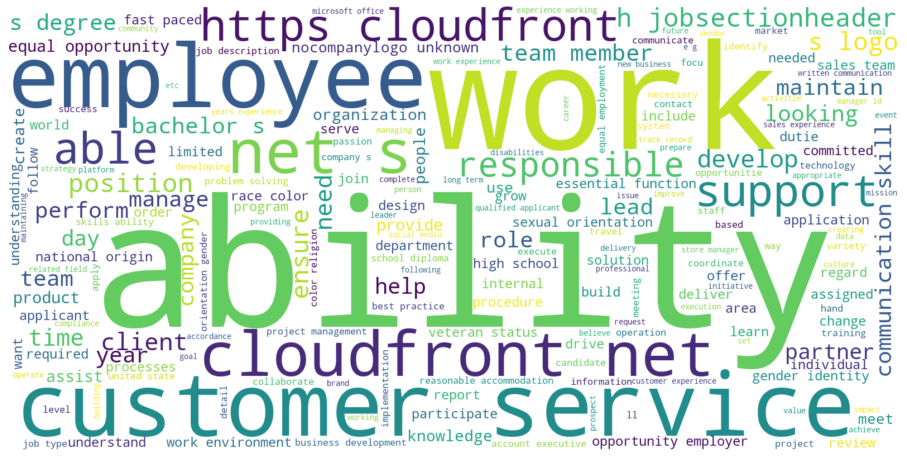

In [34]:
STOPWORDS = spacy.lang.en.stop_words.STOP_WORDS
plt.figure(figsize = (16,14))
wc = WordCloud(min_font_size = 3,  
               max_words = 200, 
               width = 1600, 
               height = 800,
               background_color='white',
               stopwords = STOPWORDS).generate(str(" ".join(df.text)))
plt.imshow(wc,interpolation = 'bilinear')
plt.axis("off");